<h1>Исследование рынка игровой индустрии</h1>  

Мы работаем в интернет-магазине "Стримчик", который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
  
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Необходимо отработать принцип работы, поэтому в данном случае не критично, что данные устаревшие: по современным данным алгоритм работы будет такой же.
  
**Задача:** Выявляем определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании

**Описание данных:** 

Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
  
**Расшифровка рейтнгов ESRB:**

«EC» («Early childhood») — «Для детей младшего возраста»  
«E» («Everyone») — «Для всех» ( тоже самое что "K-A" ("Kids to Adults"))  
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»  
«T» («Teen») — «Подросткам»  
«M» («Mature») — «Для взрослых»  
«AO» («Adults Only 18+») — «Только для взрослых»  
«RP» («Rating Pending») — «Рейтинг ожидается»  

<h1>Шаг 1. Просмотр файлов с данными и изучение общей информации</h1>  

<h4>Просмотр датасета, изучаю общую информацию методами info() и describe(): </h4>  

In [1]:
import pandas as pd #импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from scipy import stats as st

try: #используем конструкцию try-except чтобы 100% прочитать файл
    games_data = pd.read_csv('C:/Users/Полинария/Downloads/games.csv', sep=',') #чтение локально
except:
    games_data = pd.read_csv('/datasets/games.csv', sep=',') #чтение файла на сервере
display(games_data.head()) #знакомимся с данными

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


На этапе подготовки данных надо будет привести названия столбцов к единому регистру.

In [2]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Уже видно пропуски, с которыми придется что-то делать на этапе предобработки данных. Ладно, проверим сразу на дубликаты, может не везде все грустно:

In [3]:
print('Нашлось {} дубликатов'.format(games_data.duplicated().sum()))

Нашлось 0 дубликатов


Не везде все плохо! По крайней мере явных дубликатов нет :D

In [4]:
games_data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<h1>Выводы по Шагу 1:</h1>  

Нам повезло, что в данных нет очевидных дубликатов. Кроме того в данных полно пропусков, предположения об их возниконовении обсудим на следующем шаге, а так же решим что с ними делать. 

<h1>Шаг 2. Подготовка данных</h1>  

<h4>Приведение названий столбцов к нижнему регистру</h4>  

In [5]:
games_data.columns = games_data.columns.str.lower() 
display(games_data.columns) #проверка

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<h4>Преобразование типов данных</h4>  

Пойжем по порядку и преобразуем столбец года выпуска к целочисленному типу, однако мы помним, что там есть пропуски. Поэтому сначала избавимся от них. Удалять строки с пропусками мы не будем (хоть и их доля мала в общей выборке-я просто не фанат удалять данные, если в этом нет необходимости), но и ставить наобум дату не годится (выход одной и той же игры на разнвх платформах может отличатся на несколько лет, поставлю вместо пропусков 2021 (год, когда появлялись последние новости от разработчиков об игре, которую я очень жду и которую купила уже несколько лет назад). Такое решение не исказит результаты и не испортит анализ. Что касается гипотезы возникновения пропусков - предполагаю, что это ошибка выгрузки, так как игры без даты выходы быть не может.

In [6]:
games_data['year_of_release'] = games_data['year_of_release'].fillna(2021)
games_data['year_of_release'] = games_data['year_of_release'].astype('int')

Двигаемся дальше по-порядку, и видим, что столбец с оценками пользователей типа object, что странно, выведем уникальные значенися:

In [7]:
display(games_data['user_score'].unique())

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим среди баллов значение tbd, что скорее всего является аббривеатурой от to be defined. При выгрузке данных об оценках пользователей, такое возможно если отзывов игроков слишком мало, чтобы указывать средний балл от игроков. Я бы хотела привести данные к вещественному типу и поменять tbd на nan:

In [8]:
games_data.loc[games_data['user_score'] == 'tbd', 'user_score'] = float('nan')
games_data['user_score'] = games_data['user_score'].astype('float')
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


С типами данных разобрались.  

<h4>Обработка пропусков</h4>  

Мы уже выяснили, что в данных много пропусков. Пропуски с датой выхода мы заменили на условный год. Посмотрим какая доля пропусков в других столбцах и предположим, что случилось:

In [9]:
games_data.isnull().sum().sort_values(ascending = False) / games_data.shape[0] * 100

user_score         54.591684
critic_score       51.319174
rating             40.478612
name                0.011965
genre               0.011965
platform            0.000000
year_of_release     0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
dtype: float64

Как я уже писала ранее пропуски в оценках пользователей могут быть обусловлены слишком маленьким количеством отзывов. Заполнить ни медианой ни схожей оценкой на другой платформе будет ошибкой - исказит статистический анализ, поэтому лучше всего будет заполнить очередным условным значением, в голову пришел 0, но есть игры, которые реально оценили на ноль :С (мы проверяли выше методом unique), поэтому пусть будет -1. Такую. же операцию проделаем с оценками критиков, опять таки оценки и рейтинг на разных платформах могут колоссально отличаться (уж я то задрот, точно знаю!). Гипотеза о пропуске оценок критиков такая же - они могли просто не оценивать игру, а могла иметь место ошибка выгрузки. Если честно, то я склоняюсь к первому, отсутвие оценок критиков вполне возможно, либол их было слишком мало, чтобы усреднить.

In [10]:
games_data['user_score'] = games_data['user_score'].fillna(-1)
games_data['critic_score'] = games_data['critic_score'].fillna(-1)

Пропуски рейтинга думаю стоит заменить пометкой "нет рейтинга". Смотреть и подбирать рейтинг по аналогии с платформой, у которой ретйинг игры может быть указан не подойдет для дальнейшего анализа: для разных платформ (а иногда и для разных стран) рейтинг и контент в игре может отличаться. Думаю по аналогии заполним пропуски названия и жанра:

In [11]:
games_data['rating'] = games_data['rating'].fillna('no rating')
games_data['genre'] = games_data['genre'].fillna('no genre')
games_data['name'] = games_data['name'].fillna('no name')

In [12]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


С типами данных и пропусками разобрались.

<h4>Расчет суммарных продаж во всех регионах</h4>  

Если я правильно поняла, то мы просто складываем продажи во всех регионах:

In [13]:
games_data['total_sales'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales'] + games_data['other_sales']
display(games_data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,no rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,no rating,31.38


<h1>Выводы по Шагу 2:</h1>  

Сделали все что хотели, данные можно считать подготовленными для дальнейшего анализа.

<h1>Шаг 3. Исследовательский анализ данных</h1>  

<h4>Выпуск игр в разные годы, определение значимого периода для исследования</h4>  

Построим обычную диаграмму, чтобы визуально оценить выпуск игр в разрезе по годам:

<AxesSubplot:xlabel='year_of_release'>

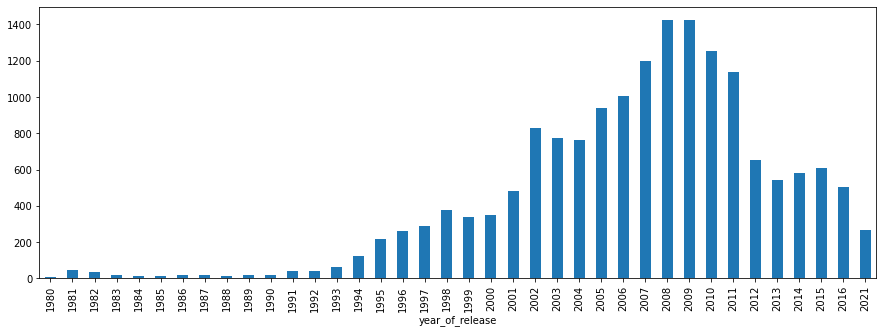

In [14]:
games_data.groupby('year_of_release')['name'].count().plot(kind = 'bar', figsize=(15,5))

Тут можно немного углубится в историю и вспомнить, что первая видеогра появилась чуть ли не в 60х и была (разумеется!) про космос, а первая доступная видеоигра была выпущена в 70х. На графике видно, что с 1980 по 1994 год мы наблюдаем плато - мощностей не хватало на производство серьезных сюжетных игр. А дальше вплоть до 2008 года идет рост, что понятно: появляются разнообразные консоли, развиваются и игры на ПК, 2000 году выходит самая продаваемая в мире консоль - playstation 2. После 2009 года производство идет на спад: я думаю что это связано со стагнацией многих платформ, а также развитию мобильного гейминга, так как сделать мобильную игру дешевле, проще и быстрее, а зарабатывают такие проекты как полномасштабные серьезные игры. Второе предположение - кризис 2008 года, а может все вместе. Мы сможем сделать выводы о верности моей догадки, когда рассмотрим, что происходит с выпуском игр по годам в разрезе по консолям. 
Так как наша задача спланировтаь компанию на 2017 год, мы можем отсечь большое количество данных. На многие платформы игры в 2016году уже просто перестали производится.  

Посмотрим количество игр в разрезе по платформам, так же, используем диаграмму:

<AxesSubplot:xlabel='platform'>

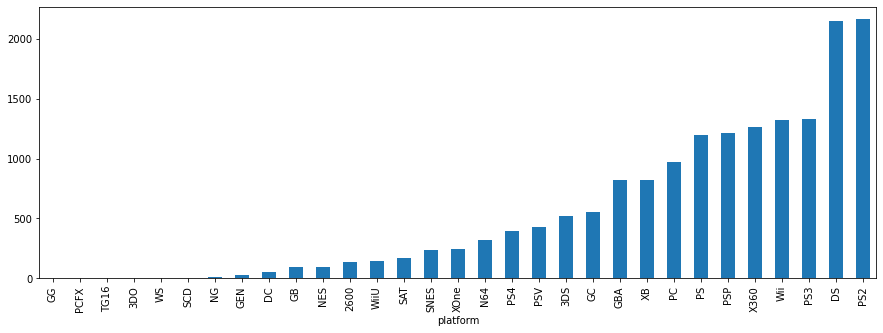

In [15]:
games_data.groupby('platform')['name'].count().sort_values().plot(kind = 'bar', figsize=(15,5))

В целом ничего удивительного: на самую продаваемую консоль вышло наибольшое количество игр. Однако при планировании рекламного бюджета на 2017 год нельзя ориентироваться на этот график - консоли, которые в топе уже могли изжить себя. Поэтому следующий шаг посмотреть объемы выручки в разрезе по консолям, а потом по самым прибыльным посмотреть выручку по годам. Кроме того, стоит решить вопрос о сроке жизни платформы, чтобы не было того, что мы заложили бюджет на рекламу, а игр на соответсующую консоль не вышло, потому что ее популярность ушла.

<h4>Объем продаж в разрезе по платформам, распределение по годам. Срок жизни платформы.</h4>  

Пострим на диаграмме теперь лидеров по продажам:

<AxesSubplot:xlabel='platform'>

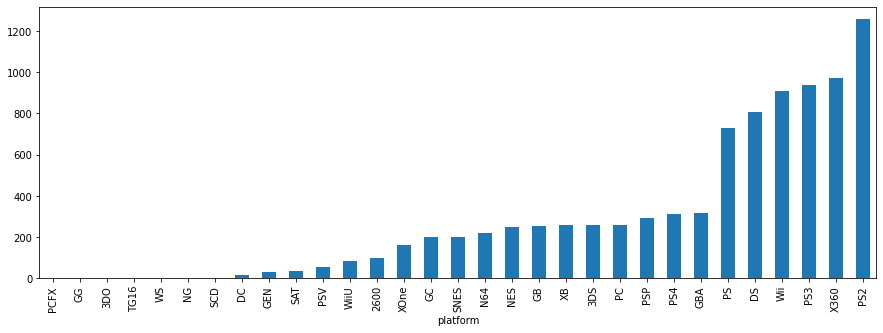

In [16]:
games_data.groupby('platform')['total_sales'].sum().sort_values().plot(kind = 'bar', figsize=(15,5))

Как видно из диаграммы если лиедрство в продажах все так же за самой продаваемой консолью, то по остальным платформам: большое количество игр не всегда равно высоким продажам.  

Пусть график получится трудночитаемый, но чтобы проиллюстрировать "смерть" разных платформ и изменение поопулярности построим график, отражающий продажи по годам в разрезе по платформам:

<AxesSubplot:xlabel='year_of_release'>

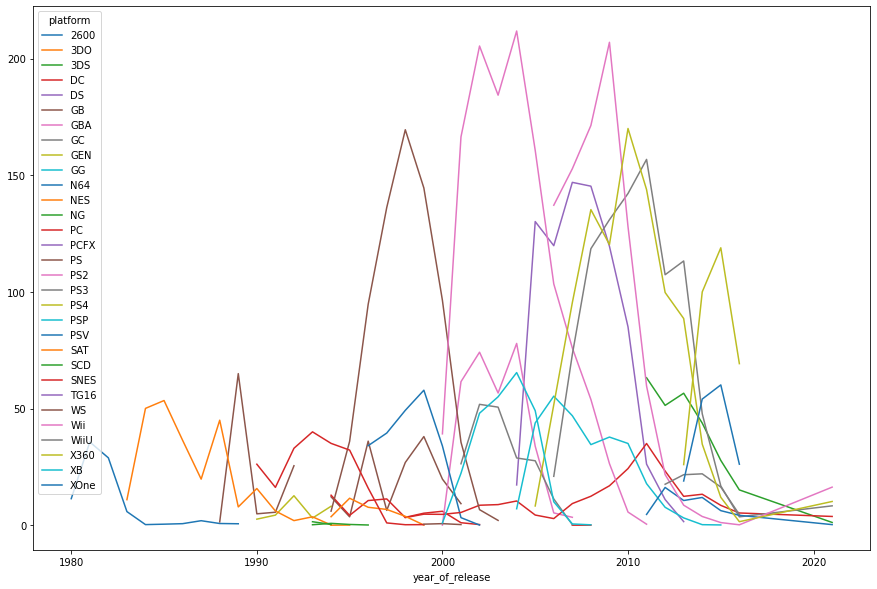

In [17]:
games_data.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum' ).plot( figsize=(15,10))

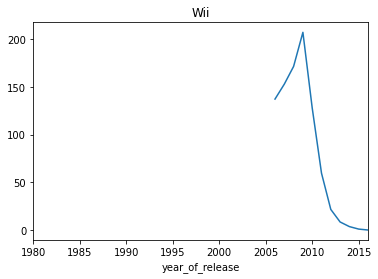

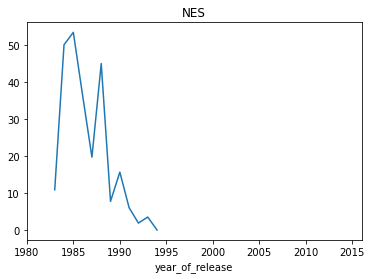

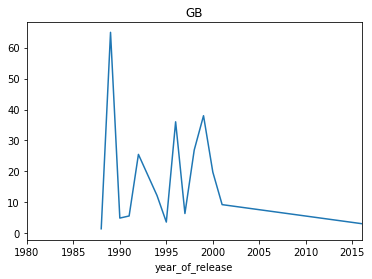

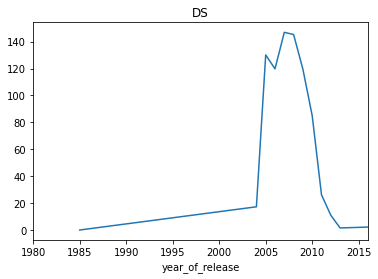

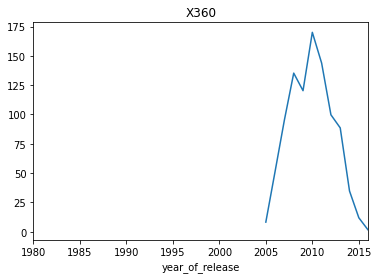

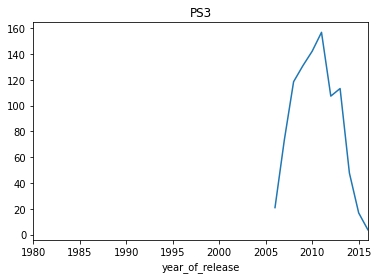

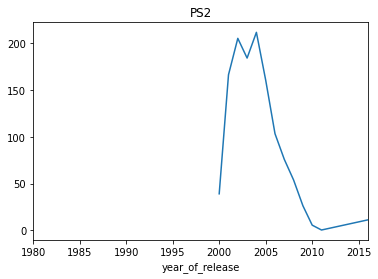

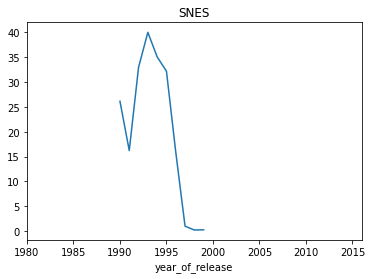

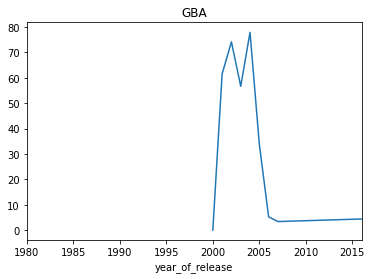

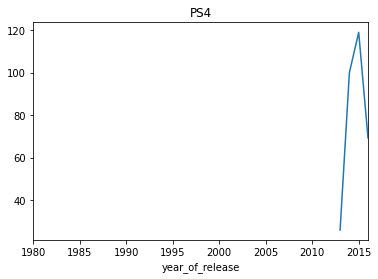

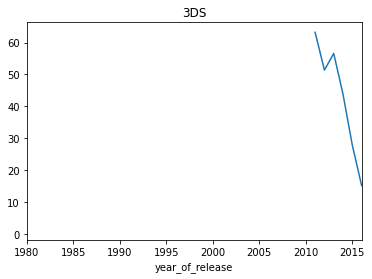

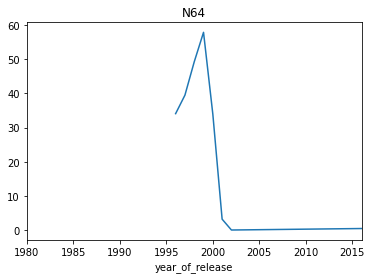

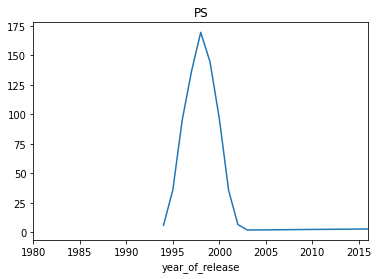

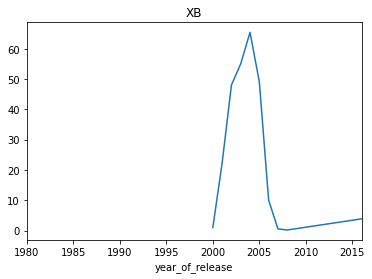

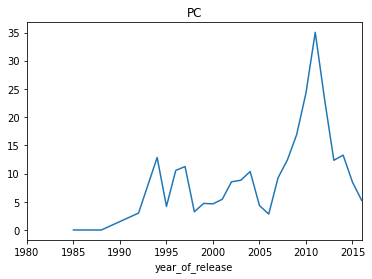

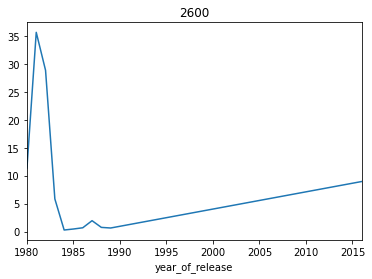

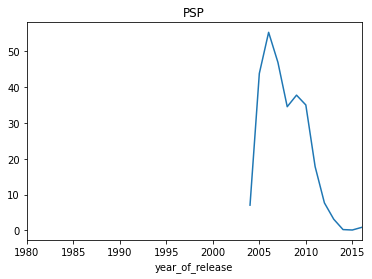

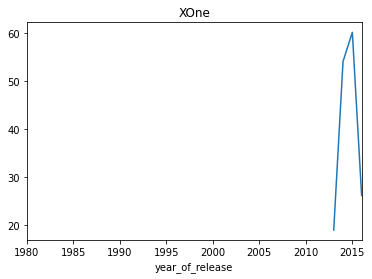

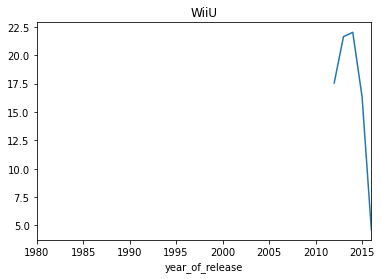

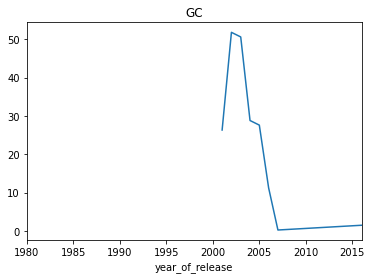

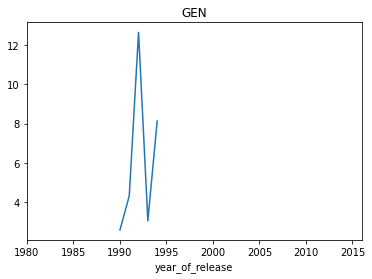

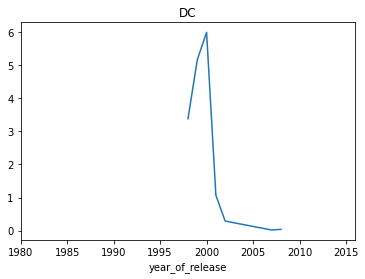

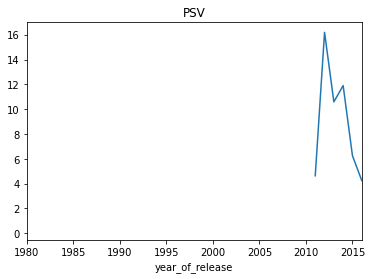

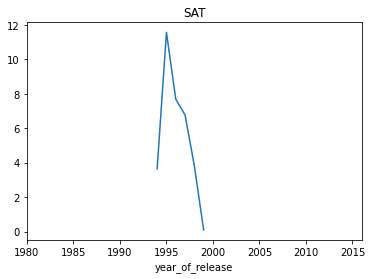

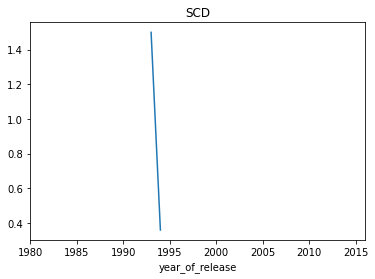

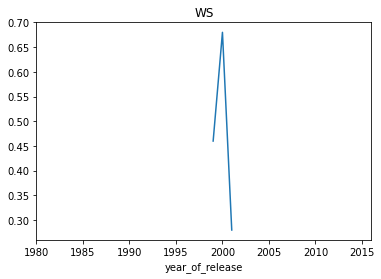

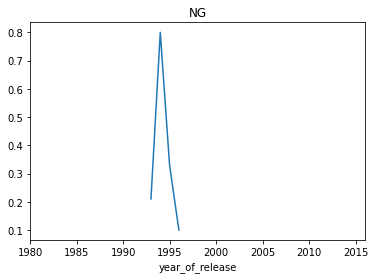

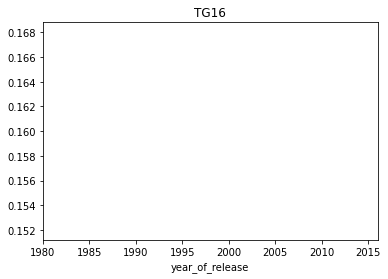

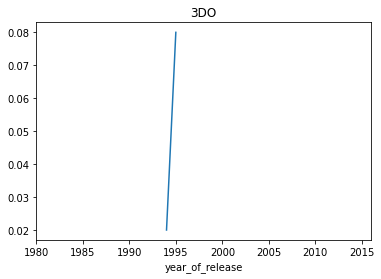

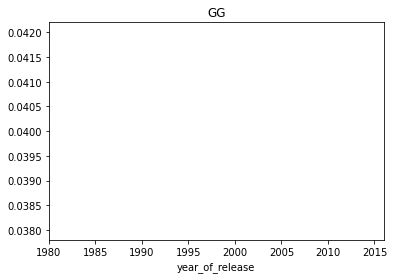

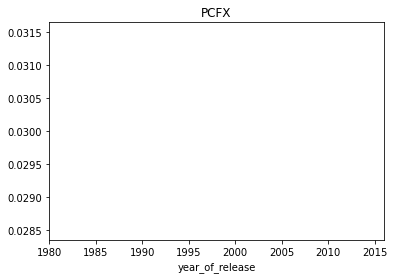

In [18]:
platforms = games_data['platform'].unique().tolist()
for platform in platforms:
    games_data.loc[games_data['platform'] == platform].groupby('year_of_release')['total_sales'].sum().plot()
    plt.xlim(1980,2016)
    plt.title(platform)
    plt.show()

Справделиво заметить, что самой долгоиграющей платформой является ПК, оно и ясно: "железо" в компьютере всегда можно обновить, а приставку по частям не пересоберешь. Срок жизни платформы на глазок - лет 5-7, однако это не касается таких мастодонтов индустрии как xbox360, ps2/3, psp и Wii. Собственно попробуем срок жизни платформы расчитать:

In [19]:
platform_list = games_data['platform'].unique().tolist()
data = []
first_year = []
for platform in platform_list:
    lifetime = len(games_data.loc[games_data['platform'] == platform,'year_of_release'].unique()) #длина списка с годами, когда для платформы производились игры
    year = games_data.loc[games_data['platform'] == platform,'year_of_release'].min() #год выпуска первой игры для платформы
    data.append(lifetime)
    first_year.append(year)    
platform_list = pd.Series(platform_list, name='platform')
data = pd.Series(data, name='lifetime')
first_year = pd.Series(first_year, name='first_year')
platforms_lifetime = pd.concat([platform_list, data, first_year],axis=1)
platforms_lifetime = platforms_lifetime.sort_values(by='lifetime') #сделали таблицу срока жизни платформ и отсортировали по возрастанию срока жизни
# display(platforms_lifetime) - здесь я смотрела, что получилось, но будет информативнее и красивее вывести графиком, ну и места меньше сожрет

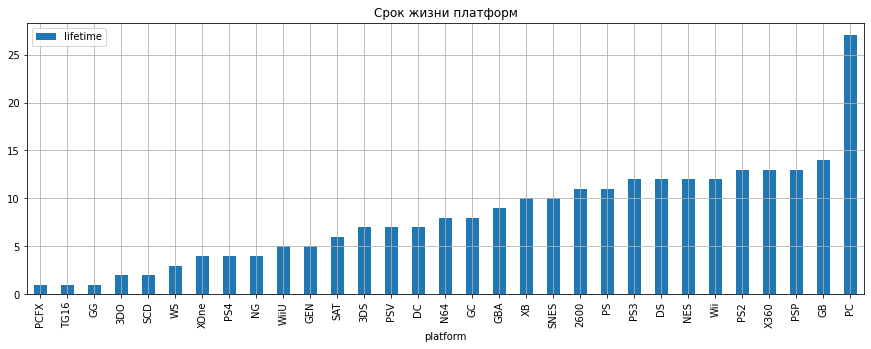

In [20]:
platforms_lifetime.plot(kind='bar', x='platform', y='lifetime', figsize=(15,5), grid=True, title='Срок жизни платформ');

Ну теперь не только на словах, а на деле видно, что ПК - лучший выбор ;) Открытием для меня конечно стал геймбой, я думала, что это это весьма временное явление, но видимо в Японии думают иначе. Итак посмотрим средний срок жизни платформы, однако для чистоты эксперимента я бы исключила ПК, так мы уже убедились, что ПК это нечто вечное:

In [21]:
display('Средний срок жизни платформы (v.2) {:.2} лет'.format(platforms_lifetime.query('lifetime < 25')['lifetime'].mean()))

'Средний срок жизни платформы (v.2) 7.6 лет'

Можно заметить, что наибольший срок жизни имеют современные платформы - PSP, Wii, X360, PS2, поэтому в целом можно наблюдать тенценцию к увеличению среднего срока жизни платформы.  


<h4>Определение актуального периода.</h4>  

Теперь когда мы немного познакомились с данными и сделали выводы о среднем сроке жизни платформ необходимо определить актуальный период, чтобы анализ нам помог определить рекламную компанию и перспективные платформы. Так как средний срок жизни платформы (если не считать ПК, я поясняла почему) составляет 7,6 лет, то актуальный период возьмем равный половине этого срока (на трудночитаемом графике с платформами видно, как пик приходится где то на середину жизни, а потом падает). Итак для дальнейшего анализа актуальным промежутком является период с 2012 года.  К слову на это время приходится спад индустрии (показатели падают). Кстати если посмотреть на графики период 2012-2016 можно охарактеризовать как относительно однородный по количеству выпускаемых игр в год и продажам.

In [22]:
games_filtered = games_data.query('year_of_release >= 2012')

<h4>Выбор прибыльных платформ.</h4>  

Теперь изучим платформы, игры к которым выпускаются в рассматриваемый период. Определим лидеров продаж, а так же тенденции к росту/падению:

<AxesSubplot:xlabel='platform'>

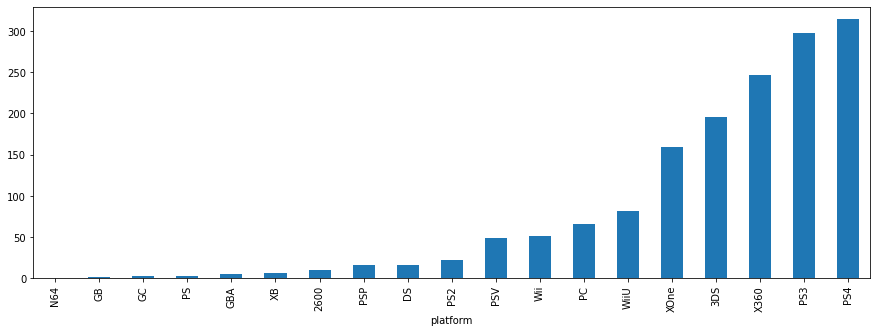

In [23]:
games_filtered.groupby('platform')['total_sales'].sum().sort_values().plot(kind = 'bar', figsize=(15,5))

Думаю дальше будем работать только с топ-10:

In [24]:
games_filtered = games_filtered.query('platform == ["PS4","PS3","X360","3DS","XOne","WiiU","PC","Wii","PSV","PS2"] & year_of_release < 2020')

И сразу посмотрим тенденции по продажам:

<AxesSubplot:xlabel='year_of_release'>

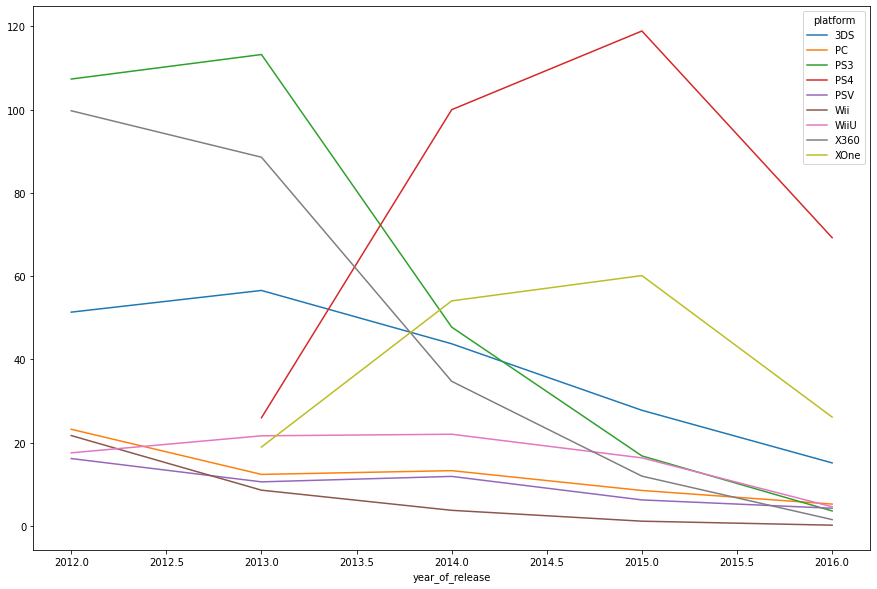

In [25]:
games_filtered.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum' ).plot( figsize=(15,10))

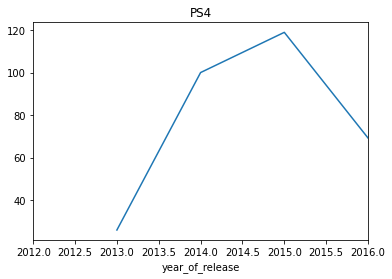

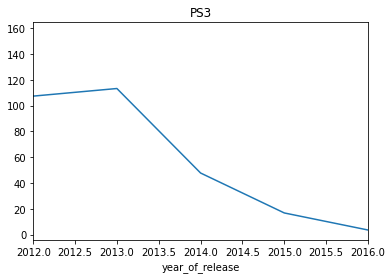

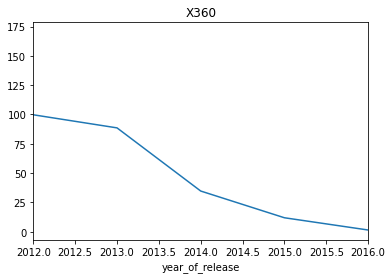

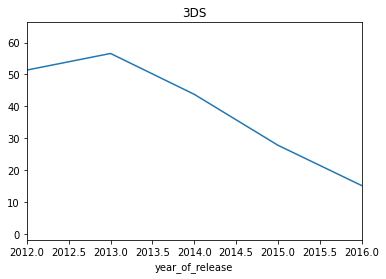

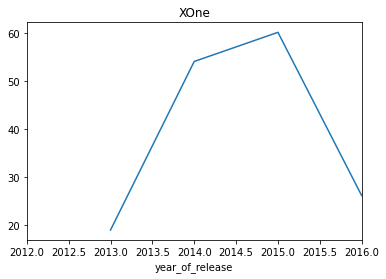

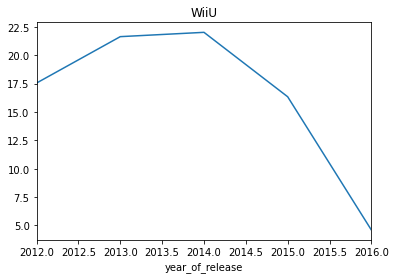

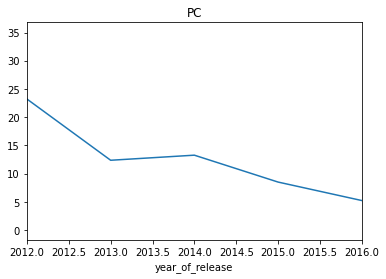

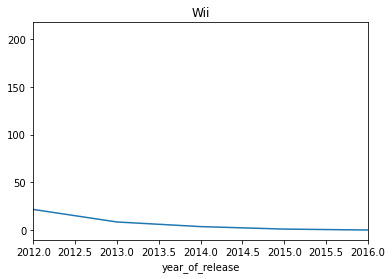

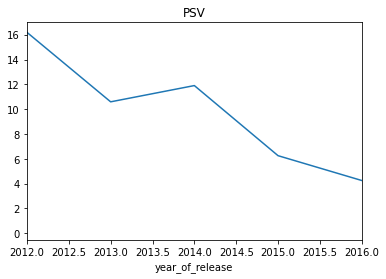

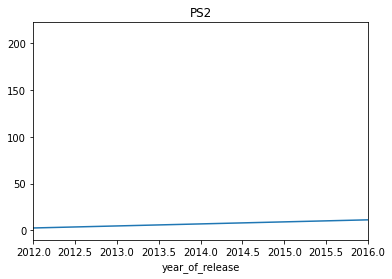

In [26]:
platforms = ["PS4","PS3","X360","3DS","XOne","WiiU","PC","Wii","PSV","PS2"]
for platform in platforms:
    games_data.loc[games_data['platform'] == platform].groupby('year_of_release')['total_sales'].sum().plot()
    plt.xlim(2012,2016)
    plt.title(platform)
    plt.show()

Несмотря на то что всем данным самая популярная и массовая платформа ПС2, на момент исследования она уже не актуальна(. Точно также неактуальна ПС3, которая на графике продаж за 20ё2-2020 занимает второе место, а по факту она уже уступает место ПС4 и даже продажи игр на ПК превышают продажи на ПС3.  

В целом можно заметить, что наилучший потенциал у консолей восьмого поколения, которые пришли на замену PS3, XBox360 и Wii. Портативные консоли, которые находятся в топе продаж, также относятся к восьмому поколению.
Таким образом, выводы о потенциально прибыльных платформах:  

**PS4** - пришла на смену популярной PS3. Представитель консоли восьмого поколения.  
**XBoxOne** - пришла на смену Xbox, вечный конкурент PlayStation. Представитель консоли восьмого поколения.  
**3DS** - Nintendo 3DS портативная консоль, ближайший конкурент PS Vita. Представитель консоли восьмого поколения.  
**PC** - продажи игр на ПК не такие впечатляющие, как на консоли, однако как правило покупатели игр на ПК это другие люди, нежели покупатели игр на консоли, поэтому стоит охватить всех пользователей.  
**WiiU** - пришла на смену Wii. Менее популярный представитель консолей восьмого поколения, чем PS3 и XOne. Однако на нее есть свои экслюзивы, кроме того мне кажется, что она может быть популярнее своих конкурентво на азиатском рынке.  
**PSV** - прямой конкурент 3DS. Также 8 поколение консолей.  

Таким образом перспективными мы считаем консоли, а также портативными консоли восьмого поколения и ПК:

In [27]:
platforms = ['PS4','XOne','PC','WiiU','PSV','3DS']

Такой выбор консолей продиктован тем, что продавая игры для этого набора консолей мы сможем макисмально охватить разного рода геймеров из разных регионов. То есть мы диферсифицируем продукт, который продаем и максимизируем прибыль.  

<h4>"Ящик с усами" по глобальным продажам на перспективных платформах.</h4>  

(0.0, 8.0)

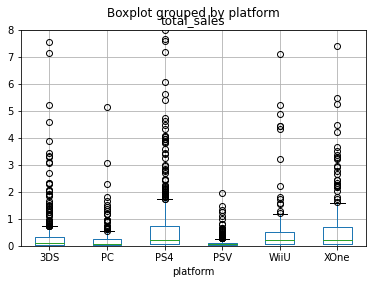

In [28]:
filtered = games_filtered['platform'].isin(platforms)
games_filtered[filtered].boxplot(column = 'total_sales', by='platform')
plt.ylim(0,8)

Диаграммы размаха домашних консолей похожи между собой, многие игры выходят сразу для всех консолей. Однако у ПС4 больше всего эксклюзивов - и на диаграмме разброс больше. Посмотрим ближе:

(0.0, 1.0)

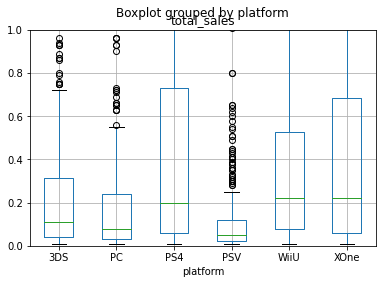

In [29]:
games_filtered[filtered].boxplot(column = 'total_sales', by='platform')
plt.ylim(0,1)

Теперь еще лучше видно, как похожи диаграммы размаха у домашних консолей: они все имеют похожую медиану, медиана WiiU и XOne совпадают, а также у PS и XOne очень похожи границы межквартильного размаха. Насчет портативных консолей: видно как PS Vita уступает своему конкуренту 3DS. Спрос на ПК игры находится где то между конкурентами по портативным консолям, и можно было бы оставить топ-5, но мне кажется, что PS Vita и 3DS занимают разные географические рынки.  

<h4>Влияние отзывов на продажи в рамках одной платформы</h4>  

Посмотрим взаимосвязь между оценками критиков и пользователей и продажами на примере PS4 - самой популярной платформы в рамках нашего исследования:

In [30]:
ps_data = games_filtered.query('platform == "PS4" & critic_score != -1 & user_score != -1')
display(ps_data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


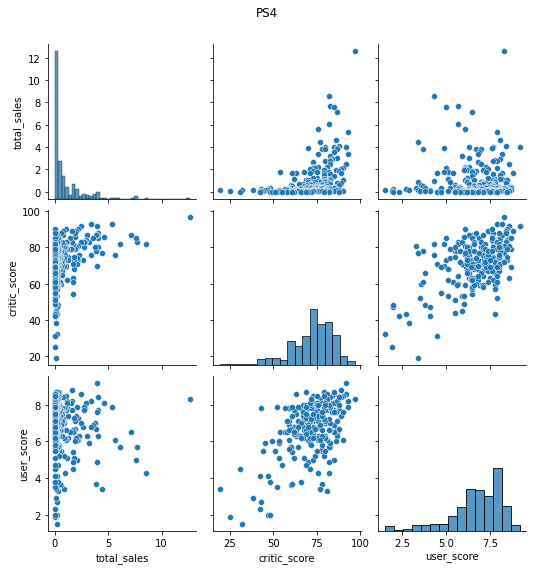

In [31]:
correlation = sns.pairplot(ps_data[['total_sales','critic_score', 'user_score']])
correlation.fig.suptitle('PS4', y= 1.05)
plt.show()

Диаграмма рассеивания демонстрирует достаточно сильную корреляцию между оценками критиков и пользователей. На самом деле это в целом не удивляет. При этом из графика кажется, что взаимосвязь продаж с отзывами критиков сильнее, нежели чем с отзывами пользователей.
Что ж посмотрим коэффициенты корреляции:

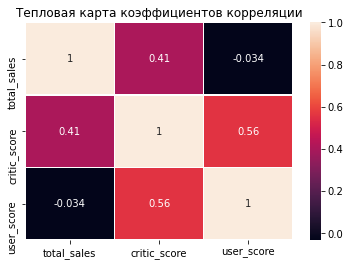

In [32]:
sns.heatmap(ps_data[['total_sales','critic_score', 'user_score']].corr(), linewidths=.2,annot = True)
plt.title('Тепловая карта коэффициентов корреляции');

Итак исходя из клоэффициентов корреляции и диаграмм рассеивания можно сделать выводы о том, что умеренная зависисмость между отзывами критиков и продажами существует. Получается у успешных в плане продаж проектов откровенно плохих отзывов критиков нет.  
А вот оценки пользователей, хоть и коррелируют с оценками критиков, но на продажи прямого вляиния не оказывают. Я конечно понимаю, что негативный отзыв может быть и у самой успешной игры: "на вкус и цвет", однако я удивлена. Возможно потому что у многих массовых игр весьма средние оценки.  


<h4>Сравнение с дургими платформами</h4>  

Теперь узнаем является ли такая ситуация справедливой и для остальных популярных платформ:

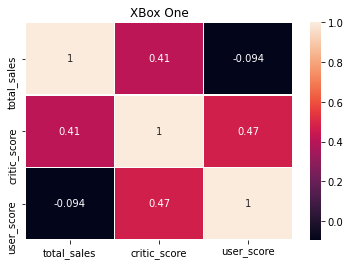

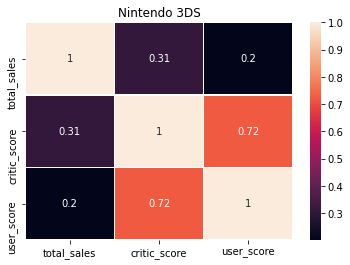

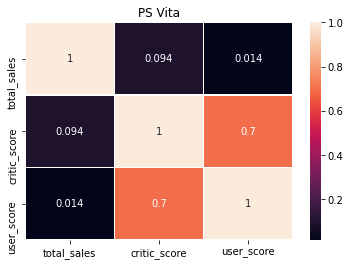

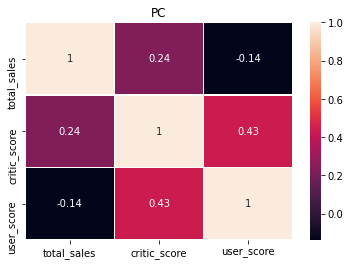

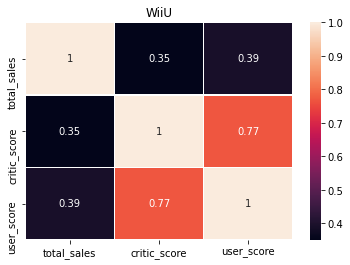

In [33]:
xone_data = games_filtered.query('platform == "XOne" & critic_score != -1 & user_score != -1')
ds_data = games_filtered.query('platform == "3DS" & critic_score != -1 & user_score != -1')
psv_data = games_filtered.query('platform == "PSV" & critic_score != -1 & user_score != -1')
pc_data = games_filtered.query('platform == "PC" & critic_score != -1 & user_score != -1')
wii_data = games_filtered.query('platform == "WiiU" & critic_score != -1 & user_score != -1')

sns.heatmap(xone_data[['total_sales','critic_score', 'user_score']].corr(), linewidths=.2,annot = True)
plt.title('XBox One')
plt.show()
sns.heatmap(ds_data[['total_sales','critic_score', 'user_score']].corr(), linewidths=.2,annot = True)
plt.title('Nintendo 3DS')
plt.show()
sns.heatmap(psv_data[['total_sales','critic_score', 'user_score']].corr(), linewidths=.2,annot = True)
plt.title('PS Vita')
plt.show()
sns.heatmap(pc_data[['total_sales','critic_score', 'user_score']].corr(), linewidths=.2,annot = True)
plt.title('PC')
plt.show()
sns.heatmap(wii_data[['total_sales','critic_score', 'user_score']].corr(), linewidths=.2,annot = True)
plt.title('WiiU')
plt.show()

Не просто так PlayStation и Xbox венчые конкуренты - даже корреляции очень похожи, в целом все домашние консоли  похожи, Wii немного отличается возможно из-за разницы рынков. Именно из-за рынка мне кажется, что корреляционные матрицы у консолей Nintendo (3DS и Wii) очень похожи между собой: оценки критиков и пользователей стали еще более близки между собой, а вот влияние критиков на продажи слабее, чем у PS4 и Xbox. В тоже время что влияет на продажи PS Vita - одному Богу известно. С ПУ похожая история, хотя влияние отзывов критиков чуть более прослеживается.  

<h4>Распределение игр по жанрам.</h4>    

Составим гаглядный график, где будет видно соотношение количества игр каждого жанра и число проданных копий. Напоминаю, что то что столбик с количеством больше, чем проданные копии -  у нас разные единицы измерения.

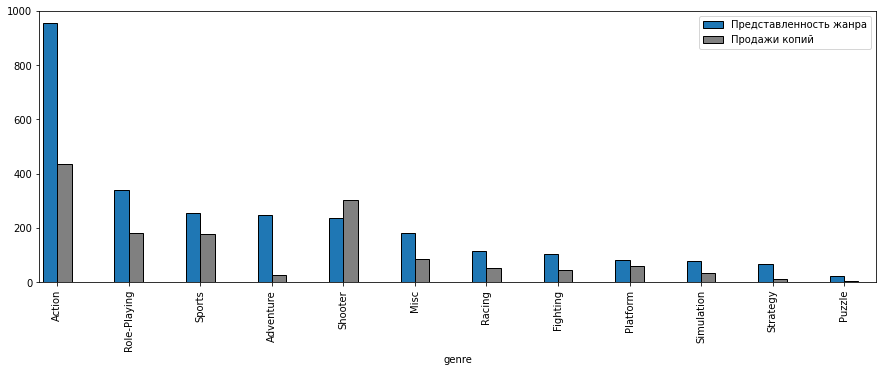

In [34]:
ax =  plt.gca()
pivot = games_filtered.groupby('genre').agg({'name': 'count', 'total_sales': 'sum'}).sort_values(by='name', ascending=False)
plot1 = pivot['name']
plot1.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, position=1)
plot2 = pivot['total_sales']
plot2.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, color='grey', position=0)

ax.legend(['Представленность жанра', 'Продажи копий'])

Самая широкая представленность у игр жанра action. Она на порядок выше, чем разнообразие игр других жанров. Конечно это может быть связано с выборкой платформ. Более чем в два раза меньше игр жанра РПГ, которые являются вторыми по представленности, а вот продаются также как менее разнообразные игры категории спорт. Возможно потому что в выборке много консолей, а на них были популярны игры как фифа, точно много спортивных игр у Wii. Видно разнообразие игр приключенческого жанра и при этом скромные продажи - опять таки думаю дело, что этот жанр популярен для игр для портативных приставок, а они в нашей выборке проигрывают полноценным консолям. Но наверно самое неочевидное наблюдение это распространненность шутеров. Хотя возможно это связано с тем что они дешевые, простые в производстве по сравнению с РПГ например.  


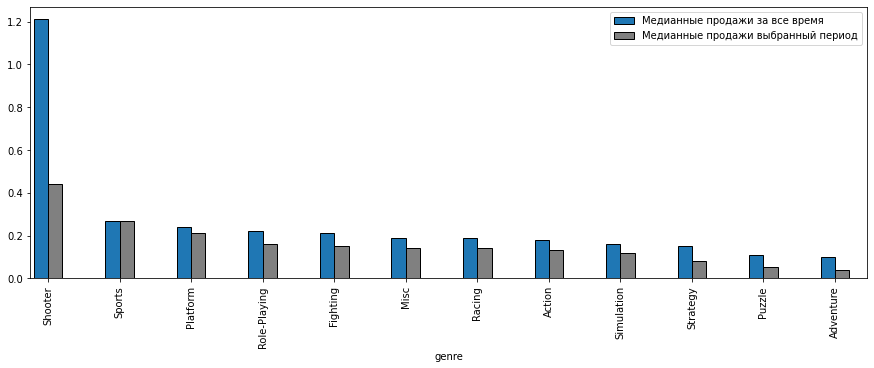

In [35]:
ax =  plt.gca()
pivot1 = games_data.groupby('genre').agg({'name': 'count', 'total_sales': 'median'}).sort_values(by='total_sales', ascending=False)
pivot2 = games_filtered.groupby('genre').agg({'name': 'count', 'total_sales': 'median'}).sort_values(by='total_sales', ascending=False)

plot1 = pivot1['total_sales']
plot1.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, position=1)

plot2 = pivot2['total_sales']
plot2.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, color='grey', position=0)

ax.legend(['Медианные продажи за все время','Медианные продажи выбранный период'])



<h1>Выводы по Шагу 3</h1>  
Коротоко подытожим:  

**1**Пик производства видеоигр приходится на 2008-2009 годы, после которых разнообразие выпускаемых игр идет на спад, что мы связываем с кризисом 2008 года, стагнацией игровых платформ, особенно самой популярной приставки - PS2, пик жизненного цикла которой как раз приходится на этот период времени (в 2011 году уже выходят приставки 8го поколения);  
**2**Платформы имеют срок жизни, более поздние по выпуску имеют более долгий срок жизни, ранние - более короткий. В среднем платформа рождается, достигает пика и угасает за 7,6 лет. Это не относится к персональным компьютерам, детали которого всегда можно заменить и собрать устройство мощнее;  
**3**Актуальный перид для нашего исследования 2012-2016 год, период выбран исходя из половины срока жизни платформы. Половина выбрана так, как после своего рассвета, выпуск игр и продажи платформы идут на спад;  
**4**Перспективными платформами для нашего исследования является 8ое поколение приставок и ПК;  
**5**Диаграммы размаха продаж домашних консолей очень похожи между собой, при этом портативные приставки и ПК им уступают;  
**6**Оценки пользователей как правило не влияют на объем продаж, за исключением японских консолей производства Nintendo, где прослеживается опредленная связь (кэффициенты корреляции 0,2 и 0,4, что значительно больше,чем у остальных), что может быьть связано со спецификой региона. Оценки критиков, напротив коррелируют с объемом продаж. В тоже время оценки критиков и пользователей часто могут быть похожи;  
**7**На протяжении всего периода с 80х годов самым популярным жанром является экшн, однако с годами представленность жанров меняется.



<h1> Шаг 4. Составление портрета пользователя каждого региона</h1>  
<h4>Топ-5 самых популярных платформ в разрезе регионов</h4>

Нам предстоит сделать ряд графиков по регионам, поэтому чтобы не дублировать похожий код напишем отдельную функцию для их построения и далее будем обращаться к ней:

In [36]:
def plot_regions(data, groupby, region, ax):
    pivot_table = data.groupby(groupby).agg({region: 'sum'}).sort_values(by=region, ascending=False)[:5]
    title_dict = {'na_sales': 'Северная Америка', 'eu_sales': 'Европа', 'jp_sales': 'Япония'}
    color_dict = {'na_sales': 'darkcyan', 'eu_sales': 'lightseagreen', 'jp_sales': 'c'}
    plot = pivot_table.plot(kind='bar', ec='black', title=title_dict[region], ax=axes[ax], 
                   fontsize=18, color=color_dict[region], rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)

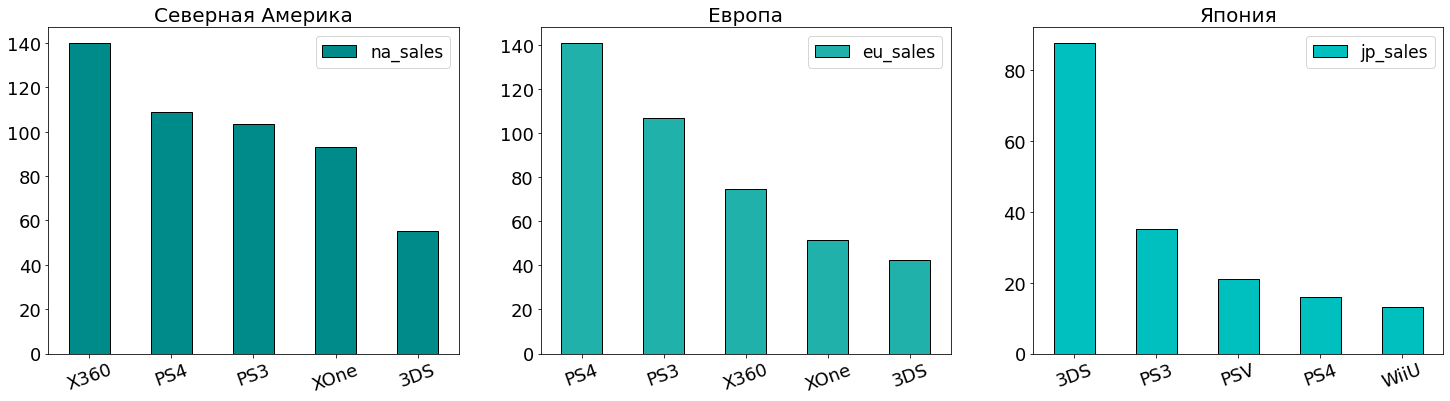

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
plot_regions(games_filtered,'platform', 'na_sales', 0)
plot_regions(games_filtered,'platform', 'eu_sales', 1)
plot_regions(games_filtered,'platform', 'jp_sales', 2)

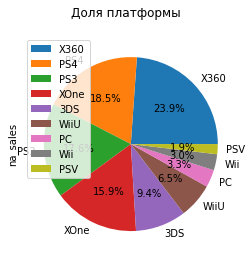

In [38]:
def plot_regions2(data, groupby, region):
    pivot_table = data.groupby(groupby).agg({region: 'sum'}).sort_values(by=region, ascending=False)#[:5]
    #title_dict = {'na_sales': 'Северная Америка', 'eu_sales': 'Европа', 'jp_sales': 'Япония'}
    pivot_table.plot(kind='pie', title='Доля платформы', subplots=True, autopct='%1.1f%%' )

plot_regions2(games_filtered,'platform','na_sales')


Какая красота получилась! Японцы как всегда с другой планеты - у них у единственных такой бешеной популярностью пользуются портативные консоли, а еще у низ у единственных отсутсвуют продукты Microsoft. В целом если про такую популярность портативных консолей мне не понятно, то поддержке родных производителей можно не удивляться. Точно также как тому, что в Америке лидируют продажи на X360, а вот XOne к 2016 году еще не успел догнать X360. В любом случае вырд такой: и в Европе и в Амреике большей популярностью пользуются домашние консоли, в Японии - портативные. Для всех трех регионов за 2012-2016гг в топ-5 не вошли ПК.  

Посмотрим, что изменится если мы сделаем топ за все время?

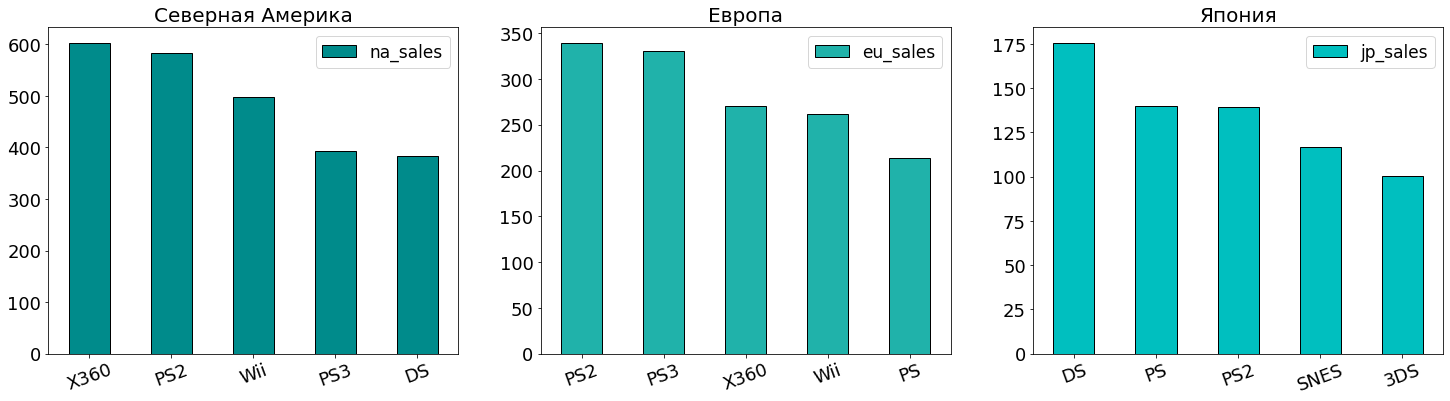

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
plot_regions(games_data,'platform', 'na_sales', 0)
plot_regions(games_data,'platform', 'eu_sales', 1)
plot_regions(games_data,'platform', 'jp_sales', 2)

Сделано не столько ради решения поставленной задачи, сколько ради любопытсва. Действительно в Японии на удливление популярны портативные консоли, в Европе при большей выборке они даже не попали в топ-5 - вся ветка занята домашними приставками. Америка тоже не удивила, несмотря на рекордные продажи PS2 в мире, X360 оказался им роднее.  

<h4>Самые популярные жанры в разрезе регионов</h4>  

Жанры посмотрим только по актуальному временному промежутку:

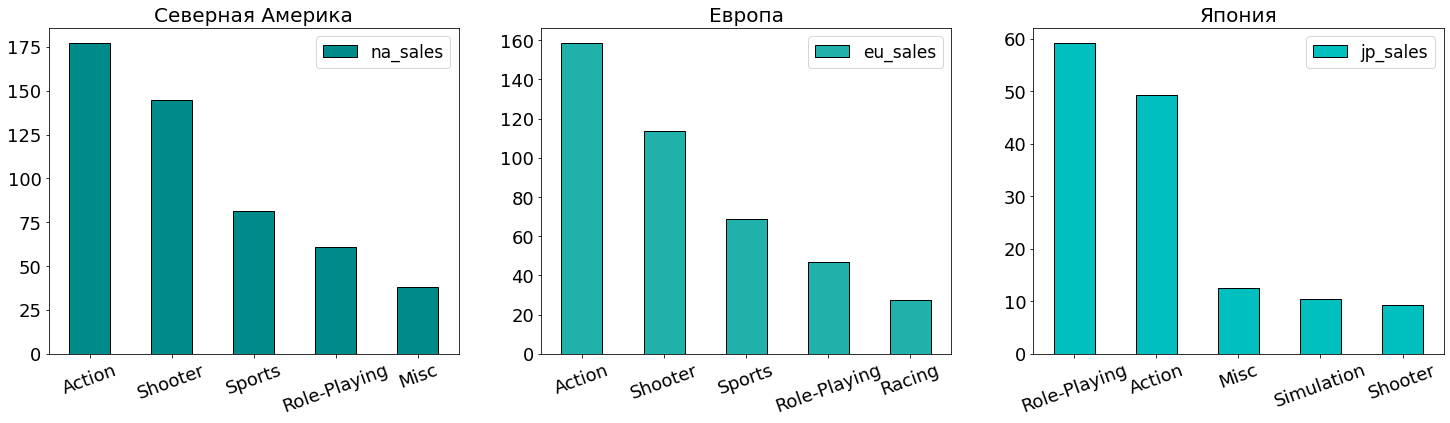

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
plot_regions(games_filtered,'genre', 'na_sales', 0)
plot_regions(games_filtered,'genre', 'eu_sales', 1)
plot_regions(games_filtered,'genre', 'jp_sales', 2)

Жанровые предпочтиения европейцев и американцев очень схожи, разве что европеец с большей вероятностью предпочтет гонки играм смешанного жанра (гонки,да ладно?!). А вот японцы опять отличаются: у них тоже популярны игры жанра экшн, но их обходят по популярности РПГ. Остальные жанры все же кратно отстают. Еще из особенностей:у японцев вырываются в топ симуляторы и отсутсвуют в лидерах игры жанра спорт и гонки. На удивление жанровые предпочтения японцев мне куда понятнее(ну спортом все же в жизни интереснее заниматься.  

<h4>Влияние рейтинга ESRB на продажи</h4>  

Вспомним какие у нас вообще есть рейтинги:

In [41]:
display(games_filtered['rating'].unique())

array(['M', 'no rating', 'E', 'E10+', 'T'], dtype=object)

Теперь понятно переименуем для графиков:

In [42]:
esrb_dict = {'M': 'Для взрослых(17+)','E':'Все возраста','E10+': 'Игроки 10+', 'T': 'Подростки 13-19'}
games_filtered['rating_description'] = games_filtered[games_filtered['rating'].notna()]['rating'].map(esrb_dict)

И воспользуемся функцией для графиков:

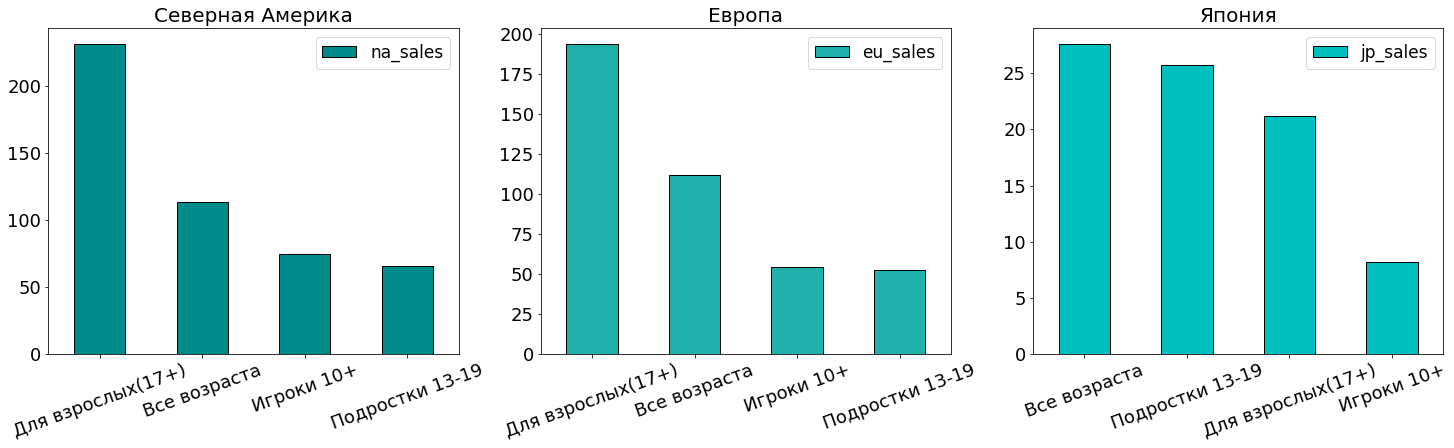

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
plot_regions(games_filtered,'rating_description', 'na_sales', 0)
plot_regions(games_filtered,'rating_description', 'eu_sales', 1)
plot_regions(games_filtered,'rating_description', 'jp_sales', 2)

Японцы опять отличились :D В Японии игры с рейтингом для всех и для подростков имеют большую популярность, чем для взрослых, в то время как в америке и европе игры для взрослых более продаваемые, чем игры для детей. 

<h1>Выводы по шагу 4</h1>

Итак очень и очень усреднённый портрет игрока:  
Япония - подросток с портативной игровой приставкой восьмого поколения, предпочитает игры в жанре РПГ и экшн;  
Америка - подросток 17+ с XBox, предпочитает экшн и шутеры;
Европа - подросток 17+ с PlayStation, среди жанров предпочитате экшн и шутеры.  


<h1>Шаг 5. Проверка гипотез</h1>  

<h4>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые</h4>

Приступаем к проверки гипотез, превая - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  Будем проверять две генеральные совокупности на равенство их средних (st.ttest_ind). Считаем, что первая генеральная совокупность - пользовательские рейтинги XOne, вторая - пользовательские рейтинги PC. В каждой выборке достаточно наблюдений, чтобы применить t-критерий. Формулируем гипотезы исходя из того, что первая гипотеза - всегда со знаком равенства:

Н0 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
H1 - средние пользовательские рейтинги платформ Xbox One и PC отличаются

В целях понимания значения аргумента equal_var метода st.ttest_ind сравним дисперсии:

In [44]:
games_filtered = games_filtered.query("user_score >= 0")
xbox_scores = games_filtered.query("platform == 'XOne'")
pc_scores = games_filtered.query("platform == 'PC'")
display(int(xbox_scores['user_score'].describe()[2])**2)
display(int(pc_scores['user_score'].describe()[2])**2)

1

1

Дисперсии равны, а значит аргументу equal_var придаем значение True, однако так ка кэто займет всего пару строчек проверим себя тестом Левена:

In [45]:
stat, p = st.levene(xbox_scores['user_score'], pc_scores['user_score'])
display(p)

0.01251484281850554

Тест Левена также не опровергает равенство дисперсий, применяем equal_var = True:

In [46]:
alpha = 0.05
result = st.ttest_ind(xbox_scores['user_score'], pc_scores['user_score'], equal_var=True)

display('p-значение:',result.pvalue)

if (result.pvalue < alpha):
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу")

'p-значение:'

0.5535080500643661

'Не получилось отвергнуть нулевую гипотезу'

**p-value больше уровня значимости. Следовательно мы не можем отвергнуть нулевую гипотизу. Это значит, что средние пользовательские рейтинги платформ Xbox One & PC равны между собой.**  

<h4>Средние пользовательские рейтинги жанров Action и Sports разные</h4>  

формулируем гипотезы исходя из того, что первая гипотеза - всегда со знаком равенства:

Н0 - средние пользовательские рейтинги жанров Action и Sports одинаковые  
H1 - средние пользовательские рейтинги жанров Action и Sports разные

Сделаем тест Левена:

In [47]:
action_games = games_filtered.query("genre == 'Action'")
sports_games = games_filtered.query("genre == 'Sports'")
stat, p = st.levene(action_games['user_score'], sports_games['user_score'])
display(p)

1.4160191671287659e-05

Получается используем equal_var = True:

In [48]:
result = st.ttest_ind(action_games['user_score'], sports_games['user_score'], equal_var=True)

display('p-значение:',result.pvalue)

if (result.pvalue < alpha):
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу")

'p-значение:'

3.639495732612309e-26

'Отвергаем нулевую гипотезу'

p-уровень значимости меньше порогового, значит мы отвергаем нулевую гипотезу, что говорит о том, что средние пользовательские оценки по жанрам экшн и спорт разные. Но попробуем еще глянуть рапсределение оценок и, если оно ненормальное проверить себя применением критерия Манна-Уитни:

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


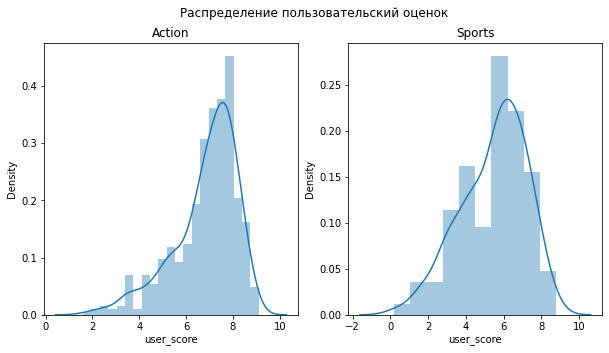

In [49]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
plt.suptitle('Распределение пользовательский оценок')
sns.distplot(action_games['user_score'], ax=axs[0]).set_title('Action')
sns.distplot(sports_games['user_score'],ax=axs[1]).set_title('Sports')
plt.show()

Из графиков видно, что распределение - ненормальное, применим критерий Манна-Уитни:

In [50]:
result = st.mannwhitneyu(action_games['user_score'], sports_games['user_score'], alternative ='two-sided')

display('p-значение:',result.pvalue)

if (result.pvalue < alpha):
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу")

'p-значение:'

1.2916679406855748e-23

'Отвергаем нулевую гипотезу'

И в этом случае нулевая гипотеза со знаком равенства отвергнута, а значит средние пользовательские оценки у двух жанров отличаются.

<h1>Выводы по шагу 5</h1>  
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Возможно это связано с тем, что на Xbox One вышло мало эксклюзивов и средние пользовательтские оценки представлены на почти одни и теже игры. В таком случае они обычно отличаются, только если плохо сделана оптимизация с одной платформы на другую (в этом случае пользователи безусловно могут поругать косяки.

Средние пользовательские оценки жанров Action и Sports отличаются. Тоже понятный и легкочитаемый вывод. Игры жанра спорт, хоть и пользуются популярностью, но зачастую имеют весьма средние и плохие оценки пользователей, что связано с тем что игры конвеерные и в них млао отличий. Например серия FIFA, которая хоть и пользуется попуцлярностью, но имеет средние оценки, потому что в каждом новом релизе ну участников команд меняют и все. Жанр Action обычно куда более сложный, игры более многогранные и увлекательные, отсюда и более высокие оценки.  

<h1>Шаг6. Общие выводы</h1>

Не буду касаться выводов, сделанных после каждого шага, так как не хочется дублировать информацию. Стояла задача выявить определяющие успешность игры закономерности, чтобы спланировать рекламную компанию магазина. Так как магазин по условию продает игры по всему миру, то необходимо учитывать особенности каждого региона. Во первых, я бы сначала распределила бюджет пропорционально представленности регионов:

(-1.120133474445093,
 1.1009587667769074,
 -1.1213637676336299,
 1.1281612111300945)

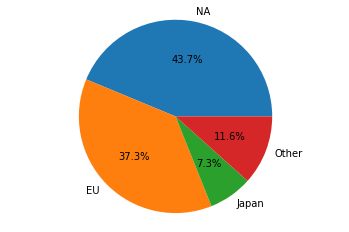

In [51]:
na = games_filtered['na_sales'].sum()
eu = games_filtered['eu_sales'].sum()
jp = games_filtered['jp_sales'].sum()
other = games_filtered['other_sales'].sum()
vals = [na, eu, jp, other]
labels = ["NA", "EU", "Japan", "Other"]
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%')
ax.axis("equal")

Например, чтобы охватить всех игроков нам все таки стоит потратить часть бюджета на подростковые игры для портативных консолей восьмого поколения(профиль игрока в японском регине), но доля бюджета не должна превышать долю, которую составляет рынок японии от всего игрового рынка. Точно так же как мы видим какая огромная доля продаж приходится на регионы Америки и Европы, где популярными являются консольные игры в жанрах экшн и спорт. Как макисмизировать прибыль нет возможности сделать рецепт, потому чтьо у нас нет данных по деньгам. Так например игр в жанре РПГ меньше, но они дороже, чем копеечные шутеры. Для распределения бюджета рекламной компании данного анализа, разумеется недостаточно, да и данные неполные. Но предположим, что я действительно владею магазином и познакомилась с ситуацией на рынке таким образом, что я буду рекламировать?  
Я потрачу рекламный бюджет на игры для консолей восьмого поколения и ПК, причем буду стараться выбирать игры, котоыре выходят сразу на нескольких платформах, чтобы охватить как можно больше пользователей и минимально потратиться. Что касается эксклюзивов для Xbox One и PS - я скорее всего на рекламу подобных игр будет потрачена минимальная сумма, так как там стараются производители консолей, их итак купят в общем. Жанры игр для рекламы буду выбирать исходя из выясненных предпочтений пользователей. Так же я не поленюсь учесть особенности азиатского рынка и десятую часть бюджета потрачу на рекламу игр для портатиных консолей, причем буду делать упор на игры для всех возрастов. Кроме того я буду отдавать предпочтение играм, которые поручились поддержкой критиков, а вот на оценки пользователей буду обращать внимание, только если это игры для Nintendo. Как то так, подробнее сложно, так как у нас нет информации по деньгам.  

Спасибо!